<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_0_4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,35.130054,83.500829,66.986447,71.022939,1.025390,267.665660,266.761711,0.903949
1,0.0,1.0,83.784443,53.658793,63.433581,21.812413,0.619895,233.309124,232.688717,0.620407
2,0.0,2.0,59.847760,92.666329,57.202631,28.602284,0.213537,248.532541,248.446804,0.085736
3,0.0,3.0,69.490346,44.676934,32.109186,50.079436,-0.308283,206.047619,206.382424,-0.334805
4,0.0,4.0,93.198157,46.594379,37.533146,27.571790,-0.298289,214.599183,214.879026,-0.279843
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,77.627766,91.008624,71.644194,53.452997,-0.470299,303.263282,303.753472,-0.490190
119996,999.0,116.0,65.351092,46.244447,39.936786,94.489410,0.407536,256.429271,255.894946,0.534325
119997,999.0,117.0,67.187574,41.589916,94.542323,61.744077,-0.590336,274.473554,275.035988,-0.562433
119998,999.0,118.0,82.876146,64.821252,32.918631,70.185818,-0.099643,260.702204,260.701692,0.000512


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    35.130054  83.500829  66.986447  71.022939  1.025390  267.665660   
      1.0    83.784443  53.658793  63.433581  21.812413  0.619895  233.309124   
      2.0    59.847760  92.666329  57.202631  28.602284  0.213537  248.532541   
      3.0    69.490346  44.676934  32.109186  50.079436 -0.308283  206.047619   
      4.0    93.198157  46.594379  37.533146  27.571790 -0.298289  214.599183   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  77.627766  91.008624  71.644194  53.452997 -0.470299  303.263282   
      116.0  65.351092  46.244447  39.936786  94.489410  0.407536  256.429271   
      117.0  67.187574  41.589916  94.542323  61.744077 -0.590336  274.473554   
      118.0  82.876146  64.821252  32.918631  70.185818 -0.099643  260.702204   
      119.0  64.166006  48.380749  58.453375  80.213728  0.122034  261.335893   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    266.761711  0.903949  
      1.0    232.688717  0.620407  
      2.0    248.446804  0.085736  
      3.0    206.382424 -0.334805  
      4.0    214.879026 -0.279843  
...                 ...       ...  
999.0 115.0  303.753472 -0.490190  
      116.0  255.894946  0.534325  
      117.0  275.035988 -0.562433  
      118.0  260.701692  0.000512  
      119.0  261.131824  0.204069  

[120000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    35.130054  83.500829  66.986447  71.022939  1.025390  267.665660   
      1.0    83.784443  53.658793  63.433581  21.812413  0.619895  233.309124   
      2.0    59.847760  92.666329  57.202631  28.602284  0.213537  248.532541   
      3.0    69.490346  44.676934  32.109186  50.079436 -0.308283  206.047619   
      4.0    93.198157  46.594379  37.533146  27.571790 -0.298289  214.599183   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  77.627766  91.008624  71.644194  53.452997 -0.470299  303.263282   
      116.0  65.351092  46.244447  39.936786  94.489410  0.407536  256.429271   
      117.0  67.187574  41.589916  94.542323  61.744077 -0.590336  274.473554   
      118.0  82.876146  64.821252  32.918631  70.185818 -0.099643  260.702204   
      119.0  64.166006  48.380749  58.453375  80.213728  0.122034  261.335893   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    266.761711  0.903949  
      1.0    232.688717  0.620407  
      2.0    248.446804  0.085736  
      3.0    206.382424 -0.334805  
      4.0    214.879026 -0.279843  
...                 ...       ...  
999.0 115.0  303.753472 -0.490190  
      116.0  255.894946  0.534325  
      117.0  275.035988 -0.562433  
      118.0  260.701692  0.000512  
      119.0  261.131824  0.204069  

[120000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,35.130054,83.500829,66.986447,71.022939,1.025390,267.665660,266.761711,0.903949
1,0.0,1.0,83.784443,53.658793,63.433581,21.812413,0.619895,233.309124,232.688717,0.620407
2,0.0,2.0,59.847760,92.666329,57.202631,28.602284,0.213537,248.532541,248.446804,0.085736
3,0.0,3.0,69.490346,44.676934,32.109186,50.079436,-0.308283,206.047619,206.382424,-0.334805
4,0.0,4.0,93.198157,46.594379,37.533146,27.571790,-0.298289,214.599183,214.879026,-0.279843
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,77.627766,91.008624,71.644194,53.452997,-0.470299,303.263282,303.753472,-0.490190
119996,999.0,116.0,65.351092,46.244447,39.936786,94.489410,0.407536,256.429271,255.894946,0.534325
119997,999.0,117.0,67.187574,41.589916,94.542323,61.744077,-0.590336,274.473554,275.035988,-0.562433
119998,999.0,118.0,82.876146,64.821252,32.918631,70.185818,-0.099643,260.702204,260.701692,0.000512


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    35.130054  83.500829  66.986447  71.022939  1.025390  267.665660   
      1.0    83.784443  53.658793  63.433581  21.812413  0.619895  233.309124   
      2.0    59.847760  92.666329  57.202631  28.602284  0.213537  248.532541   
      3.0    69.490346  44.676934  32.109186  50.079436 -0.308283  206.047619   
      4.0    93.198157  46.594379  37.533146  27.571790 -0.298289  214.599183   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  77.627766  91.008624  71.644194  53.452997 -0.470299  303.263282   
      116.0  65.351092  46.244447  39.936786  94.489410  0.407536  256.429271   
      117.0  67.187574  41.589916  94.542323  61.744077 -0.590336  274.473554   
      118.0  82.876146  64.821252  32.918631  70.185818 -0.099643  260.702204   
      119.0  64.166006  48.380749  58.453375  80.213728  0.122034  261.335893   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    266.761711  0.903949  
      1.0    232.688717  0.620407  
      2.0    248.446804  0.085736  
      3.0    206.382424 -0.334805  
      4.0    214.879026 -0.279843  
...                 ...       ...  
999.0 115.0  303.753472 -0.490190  
      116.0  255.894946  0.534325  
      117.0  275.035988 -0.562433  
      118.0  260.701692  0.000512  
      119.0  261.131824  0.204069  

[120000 rows x 8 columns]

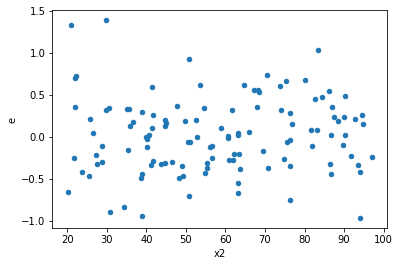

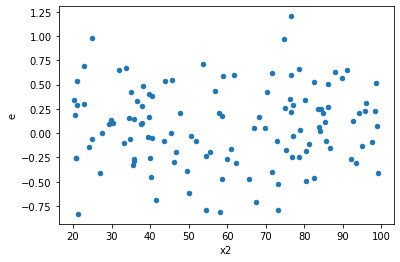

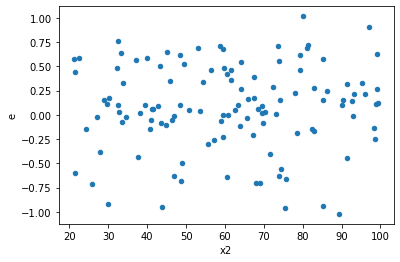

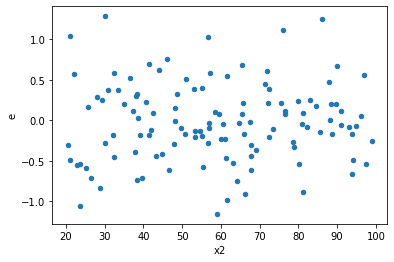

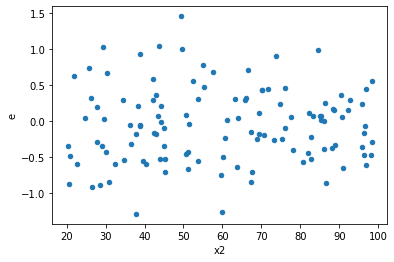

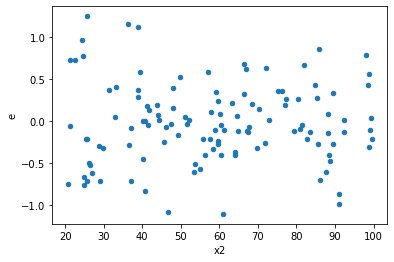

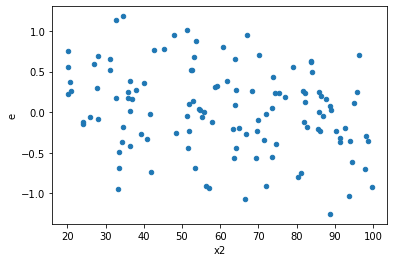

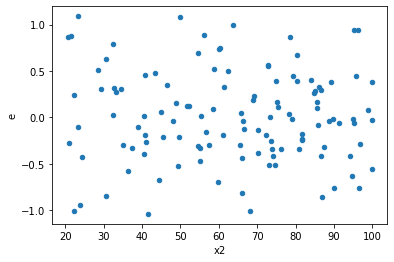

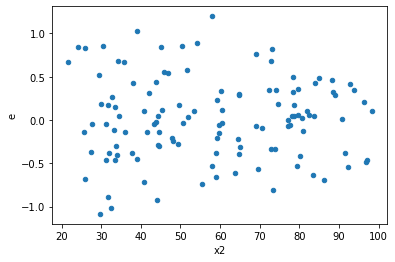

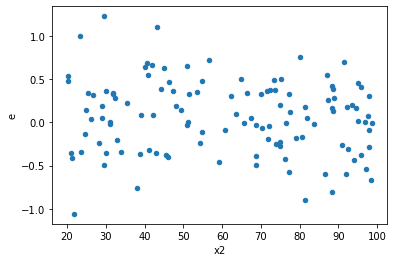

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,61.0,51.0,9.687503945880175,16.81371483083505,0.1588115400963963,0.32968068295755,2.0759239710000834,0.008168707685424437,0.9959156461572878,0.004084353842712218,Reject001=0 : Heteroscedasticity
7.0,64.0,48.0,15.329237869209159,11.700060023775785,0.2395193417063931,0.24375125049532886,1.0176683384263945,0.9588091829281129,0.5205954085359435,0.47940459146405645,Reject001=1 : Homoscedasticity
9.0,44.0,68.0,7.1794278820255055,12.723301164336094,0.16316881550057968,0.1871073700637661,1.146710353260494,0.603133204755568,0.698433397622216,0.301566602377784,Reject001=1 : Homoscedasticity
12.0,56.0,56.0,8.198760055872855,13.407077101635183,0.14640642956915811,0.23941209110062828,1.6352566742127743,0.06832102915362692,0.9658394854231865,0.03416051457681346,Reject001=1 : Homoscedasticity
13.0,48.0,64.0,7.662428345511844,13.40736183854663,0.15963392386483008,0.20949002872729108,1.3123152250813344,0.3077884841085792,0.8461057579457104,0.1538942420542896,Reject001=1 : Homoscedasticity
14.0,66.0,46.0,13.326830963434558,13.26421152786125,0.20192168126415996,0.28835242451872284,1.4280409251421178,0.20310757306345018,0.8984462134682749,0.10155378653172509,Reject001=1 : Homoscedasticity
17.0,56.0,56.0,10.252488692803691,12.353602558946545,0.18308015522863735,0.220600045695474,1.2049369600980533,0.48771960170990214,0.7561401991450489,0.24385980085495107,Reject001=1 : Homoscedasticity
18.0,63.0,49.0,12.765332153179875,13.74190204713144,0.20262431989174404,0.2804469805537029,1.3840736428062392,0.23824835824977275,0.8808758208751136,0.11912417912488638,Reject001=1 : Homoscedasticity
19.0,57.0,55.0,10.363222248367402,11.231782037692277,0.1818109166380246,0.2042142188671323,1.1232230860686514,0.6665281245584898,0.6667359377207551,0.3332640622792449,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,59.0,53.0,13.089319493128652,7.4186662057068515,0.2218528727648924,0.1399748340699406,0.63093541375179,0.08590827601397377,Reject001=1 : Homoscedasticity
1.0,53.0,59.0,8.459232486217019,8.966189646910845,0.15960816011730225,0.15196931604933636,0.952140015508281,0.8590831547956843,Reject001=1 : Homoscedasticity
2.0,54.0,58.0,11.305943983248962,10.744540594584507,0.20936933302312893,0.18525069990662943,0.8848034104696931,0.6513086015643332,Reject001=1 : Homoscedasticity
3.0,61.0,51.0,9.687503945880175,16.81371483083505,0.1588115400963963,0.32968068295755,2.0759239710000834,0.008168707685424437,Reject001=0 : Heteroscedasticity
4.0,60.0,52.0,20.040771420977816,10.249788387333941,0.3340128570162969,0.19711131514103733,0.5901309216112601,0.049185827663948224,Reject001=1 : Homoscedasticity
5.0,50.0,62.0,12.323704136593145,12.431269888729295,0.2464740827318629,0.2005043530440209,0.8134906145979978,0.4524194324885266,Reject001=1 : Homoscedasticity
6.0,52.0,60.0,14.982256834523863,13.008081045882761,0.2881203237408435,0.21680135076471269,0.7524680937111526,0.29603666408089135,Reject001=1 : Homoscedasticity
7.0,64.0,48.0,15.329237869209159,11.700060023775785,0.2395193417063931,0.24375125049532886,1.0176683384263945,0.9588091829281129,Reject001=1 : Homoscedasticity
8.0,66.0,46.0,16.981411331531813,7.7673440789195975,0.25729411108381534,0.16885530606346952,0.6562734970971168,0.11557397387619014,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      980
Reject001=0 : Heteroscedasticity     20
Name: Result_test, dtype: int64